# Webscraping The Course Forum, CS 2130

## Getting just the first 10 reviews:

In [1]:
import requests
from bs4 import BeautifulSoup
url = 'https://thecourseforum.com/course/14942/7737/'
response = requests.get(url)
# html_content = response.text

In [2]:
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the main container for all reviews (the <ul> list) based on the class 'review-list list-unstyled'
    review_list = soup.find('ul', class_='review-list list-unstyled')

    # Check if the review list was found
    if review_list:
        all_reviews = review_list.find_all('li')

        print(f"Found {len(all_reviews)} reviews.")

        for i, review_item in enumerate(all_reviews):
            review_text_div = review_item.find('div', class_='review-text-full')
            
            if review_text_div:
                review_text = review_text_div.get_text(strip=True)
                print(f"\n--- Review {i+1} ---\n{review_text}")
    else:
        print("Could not find the review list container.")
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")

Found 10 reviews.

--- Review 1 ---
Find some friends in this class early on you can consistently study with. The material is difficult but is absolutely doable to get through. The homeworks are pretty hard (especially the escape room one) so start early. The office hour queue is usually a couple of hours long so I can't recommend office hours as a particularly useful resource. Because the nature of this class builds up from the transistor all the way up to sockets in C, make sure you get help as soon as you don't understand something. Professor Graham sometimes blitzes through slides that *he* thinks everyone should understand right away, so engaging in class and asking questions is the best way to keep pace (he will slow down/go back if he realizes people are confused).

--- Review 2 ---
Halfway through the course I stopped wearing a seatbelt when I drove to class because I'd rather die than sit through another lecture.

--- Review 3 ---
Professor Graham isn't a bad person, but he of

In [3]:
# from bs4 import BeautifulSoup
# soup = BeautifulSoup(html_content, 'html.parser')

In [4]:
# paragraphs = soup.find_all('p')
# for p in paragraphs:
#     print(p.get_text())


## Getting the reviews on the other pages too

In [5]:
import requests
from bs4 import BeautifulSoup

url = 'https://thecourseforum.com/course/14942/7737/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

def get_last_page_num(url):
    pagination_div = soup.find('div', class_='pagination')
    if not pagination_div:
        print('error on first')
    page_links = pagination_div.find_all('a', href=lambda href: href and 'page=' in href)
    if not page_links:
        print('error on second')
    last_link = page_links[-1]
    last_page_href = last_link.get('href')
    # print(last_page_href)
    try:
        page_number = last_page_href.split('?page=')[1].split('#reviews')[0]
        return page_number
    except (IndexError, ValueError):
        print('error on last')

# url = 'https://thecourseforum.com/course/14942/7737/'
# get_last_page_num(url)

In [6]:
all_reviews_list = []
all_ratings_list = []


def scrape_all_reviews(url):
    all_reviews_final = []
    all_ratings_final = []

    last_page_num = get_last_page_num(url)
    # print(last_page_num)

    for i in range(1, (int(last_page_num) + 1)):
        new_url = url + f"?page={i}#reviews"
        # print("scraping page", new_url)

        response = requests.get(new_url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')

            # Find the main container for all reviews (the <ul> list) based on the class 'review-list list-unstyled'
            review_list = soup.find('ul', class_='review-list list-unstyled')

            # Check if the review list was found
            if review_list:
                all_reviews = review_list.find_all('li')

                # print(f"Found {len(all_reviews)} reviews for page {i}.")

                for j, review_item in enumerate(all_reviews):
                    review_text_div = review_item.find('div', class_='review-text-full')
                    
                    if review_text_div:
                        review_text = review_text_div.get_text(strip=True)
                        # print(f"\n--- Review {j+1} ---\n{review_text}")
                        all_reviews_final.append(review_text)
            else:
                print("Could not find the review list container.")
                break


            # Check if the review list was found
            if review_list:
                all_ratings = review_list.find_all('li')

                for review_item in all_ratings:
                    rating_div = review_item.find('div', id='review-average')
                    
                    if rating_div:
                        rating = rating_div.get_text(strip=True)
                        # print(rating)
                        all_ratings_final.append(float(rating))
            else:
                print("Could not find the rating container.")
        else:
            print(f"Failed to retrieve the webpage. Status code: {response.status_code}")

    return all_reviews_final, all_ratings_final


# url = 'https://thecourseforum.com/course/14942/7737/'
all_reviews_list, all_ratings_list = scrape_all_reviews(url)
# print(all_reviews_list[0:11])

In [7]:
print(len(all_ratings_list))
print(len(all_reviews_list))
# print(all_ratings_list)

29
29


## Placing all_review_list as a Dataframe

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt to /Users/kaylakim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kaylakim/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/kaylakim/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/kaylakim/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kaylakim/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
future_id = list(range(len(all_reviews_list)))

data = {'Id': future_id, 'review_text': all_reviews_list, 'rating': all_ratings_list}

df = pd.DataFrame(data)

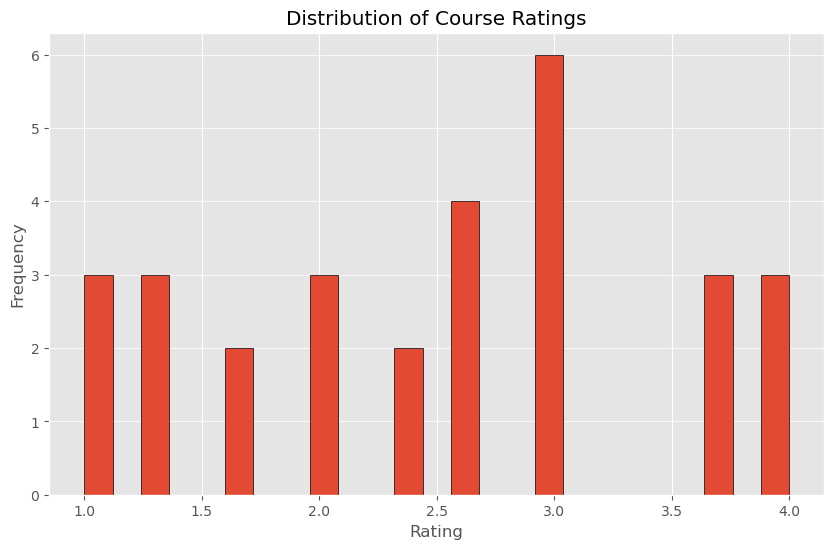

In [10]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the continuous 'rating' column
plt.figure(figsize=(10, 6))
plt.hist(df['rating'], bins=25, edgecolor='black')
plt.title('Distribution of Course Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.savefig('ratings_histogram.png')

In [11]:
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review_text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)


vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index' : 'Id'})
vaders = vaders.merge(df, how='left')

  0%|          | 0/29 [00:00<?, ?it/s]

## Using Roberta Sentiment Analysis & Hugging Face

In [12]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [13]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment" 
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [28]:
review_num = 8

print(sia.polarity_scores(df['review_text'][review_num]))
print("\n", df['review_text'][review_num])

{'neg': 0.189, 'neu': 0.75, 'pos': 0.061, 'compound': -0.9105}

 Worst class I've ever taken at UVA. So incredibly unorganized with HORRIBLE instruction. Professor Graham quit teaching halfway through the semester and would consistently get frustrated and end class early. Class instruction was incredibly inconsistent. Sometimes there would be powerpoints, sometimes he would use the white board, sometimes it would be handouts which made it so hard to stay organized.  Yes, this is a hard class, so if you can take it with anyone else, save yourself the trouble and do it.


In [36]:
compound_scores_list = []

for index, row in df.iterrows():
    this_compound = sia.polarity_scores(row['review_text'])['compound']
    compound_scores_list.append(this_compound)

print(compound_scores_list[0:10])

[0.977, -0.7003, 0.9155, 0.9696, 0.9874, 0.9589, 0.984, 0.7982, -0.9105, 0.2124]


In [38]:
average_compound_cso = np.mean(compound_scores_list)
print(average_compound_cso)

0.6078586206896552


## built in models (huggingface) to do easy sentiment analysis next time:

In [55]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

new_text = 8

print(sent_pipeline(df['review_text'][new_text]))
print(f"for text, {df['review_text'][new_text]}")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'NEGATIVE', 'score': 0.9996927976608276}]
for text, Worst class I've ever taken at UVA. So incredibly unorganized with HORRIBLE instruction. Professor Graham quit teaching halfway through the semester and would consistently get frustrated and end class early. Class instruction was incredibly inconsistent. Sometimes there would be powerpoints, sometimes he would use the white board, sometimes it would be handouts which made it so hard to stay organized.  Yes, this is a hard class, so if you can take it with anyone else, save yourself the trouble and do it.
